# **Data Preparation**

In [1]:
from keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
from keras.preprocessing.sequence import pad_sequences

# Truncate or pad the reviews to a length of 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Select 5000 samples for testing
test_data = test_data[:5000]
test_labels = test_labels[:5000]

# Select 10,000 samples for validation
val_data = test_data[:10000]
val_labels = test_labels[:10000]


# **For 100 Training Samples**

In [3]:
# Select the first 100 samples for training
train_data_100 = train_data[:100]
train_labels_100 = train_labels[:100]

# **Model Implementation**

RNN

 
RNN Model Architecture : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
 
Epoch 1/10
4/4 [==============================] - 16s 2s/step - loss: 0.6945 - accuracy: 0.5300 - val_loss: 0.6928 - 

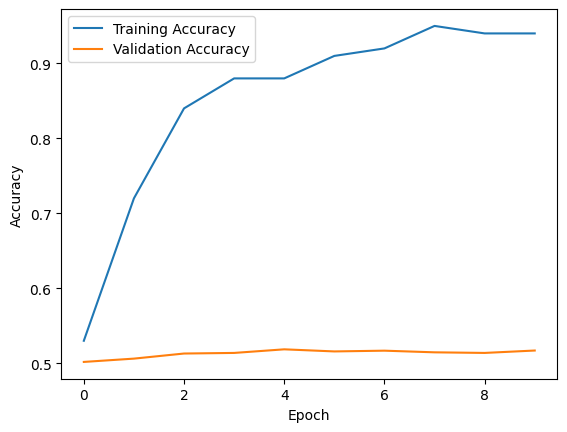

 
Loss : 
 


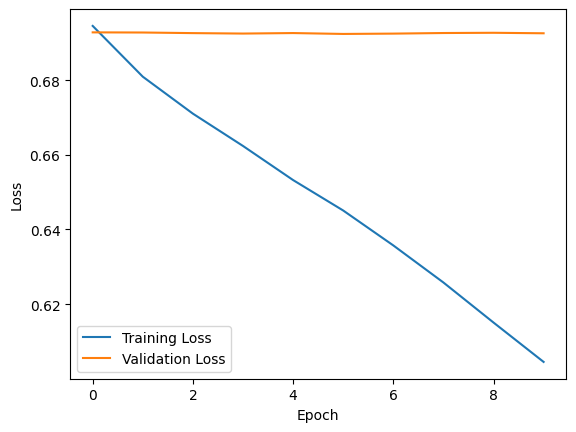

In [4]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,Activation

# Build The RNN model
rnn_model_100 = Sequential()

rnn_model_100.add(Embedding(10000,32,input_length =len(train_data_100[0])))
rnn_model_100.add(SimpleRNN(16,input_shape = (10000,maxlen), return_sequences=False,activation="relu"))
rnn_model_100.add(Dense(1)) #flatten
rnn_model_100.add(Activation("sigmoid")) #using sigmoid for binary classification
rnn_model_100.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

print(" ")
print("RNN Model Architecture : ")
print(rnn_model_100.summary())
print(" ")
# Train the RNN model
rnn_history_100 = rnn_model_100.fit(train_data_100, train_labels_100, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
rnn100_test_loss, rnn100_test_accuracy = rnn_model_100.evaluate(test_data, test_labels)

print("Test Loss : ", rnn100_test_loss)
print("Test Accuracy : ", rnn100_test_accuracy)


#Model Perfomance Evaluation
import matplotlib.pyplot as plt

print(" ")
print("Perfomance of RNN Model for 100 Training Samples : ")
print(" ")
# Plot training and validation accuracy
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_100.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_100.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
print(" ")
print("Loss : ")
print(" ")
plt.plot(rnn_history_100.history['loss'], label='Training Loss')
plt.plot(rnn_history_100.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Pre Trained Embedded Layred RNN Model

RNN Model Architecture with Pretrained Embeddings : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                1872      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1001889 (3.82 MB)
Trainable params: 1889 (7.38 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________
None
 
Epoch 1/10
4/4 [==============================] - 7s 1s/step - loss: 0.7006 - accuracy: 0.5100 - val_loss: 0.7313 - val_accuracy: 0.5086
Epoch 2/10
4/4 [==============================] - 2s 762ms/step - loss: 0.6374 - a

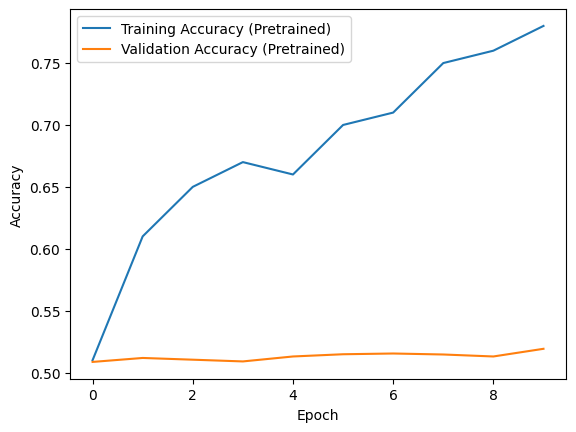

 
Loss : 
 


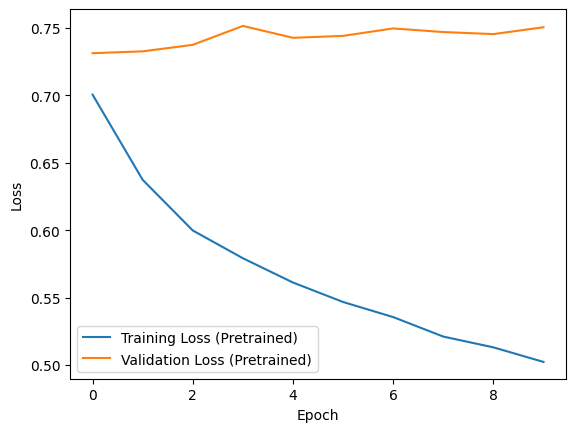

In [5]:
import numpy as np

# Load GloVe word embeddings
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Prepare the GloVe word embeddings matrix
embedding_dim = 100  # Based on the dimension of GloVe embeddings used
embedding_matrix = np.zeros((10000, embedding_dim))  # Assuming 10000 words
for i, word in enumerate(embeddings_index.keys()):  # Iterate through GloVe words
    if i < 10000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the model with pretrained word embeddings
rnn_model_pretrained_100 = Sequential()
rnn_model_pretrained_100.add(Embedding(10000, embedding_dim, input_length=maxlen, trainable=False))  # Using pre-trained embeddings
rnn_model_pretrained_100.add(SimpleRNN(16, activation="relu"))
rnn_model_pretrained_100.add(Dense(1, activation='sigmoid'))

# Set the pretrained word embeddings
rnn_model_pretrained_100.layers[0].set_weights([embedding_matrix])

# Compile the model
rnn_model_pretrained_100.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print model summary
print("RNN Model Architecture with Pretrained Embeddings : ")
print(rnn_model_pretrained_100.summary())
print(" ")

# Train the RNN model with pretrained embeddings
rnn_history_pretrained_100 = rnn_model_pretrained_100.fit(train_data_100, train_labels_100, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the test data
pre_trained_rnn100_test_loss, pre_trained_rnn100_test_accuracy = rnn_model_pretrained_100.evaluate(test_data, test_labels)

print("Test Loss : ", pre_trained_rnn100_test_loss)
print("Test Accuracy : ", pre_trained_rnn100_test_accuracy)

# Plot training and validation accuracy
print("Perfomance of Pre Trained RNN Model for 100 Training Samples : ")
print(" ")
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_pretrained_100.history['accuracy'], label='Training Accuracy (Pretrained)')
plt.plot(rnn_history_pretrained_100.history['val_accuracy'], label='Validation Accuracy (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(" ")
print("Loss : ")
print(" ")
# Plot training and validation loss
plt.plot(rnn_history_pretrained_100.history['loss'], label='Training Loss (Pretrained)')
plt.plot(rnn_history_pretrained_100.history['val_loss'], label='Validation Loss (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **For Training Samples 500**

In [6]:
# Select the first 100 samples for training
train_data_500 = train_data[:500]
train_labels_500 = train_labels[:500]


 
RNN Model Architecture : 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
 
Epoch 1/10
16/16 [==============================] - 16s 859ms/step - loss: 0.6940 - accuracy: 0.4940 - val_loss: 0.

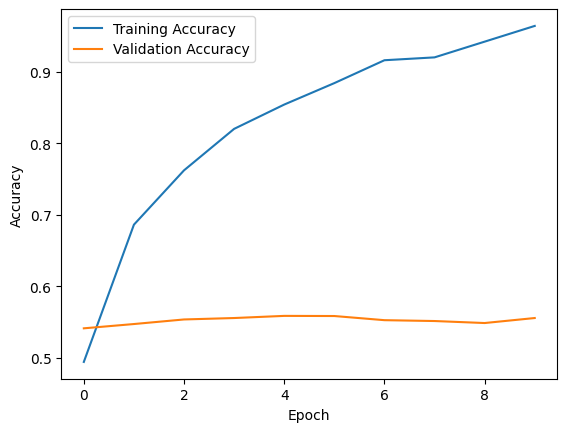

 
Loss : 
 


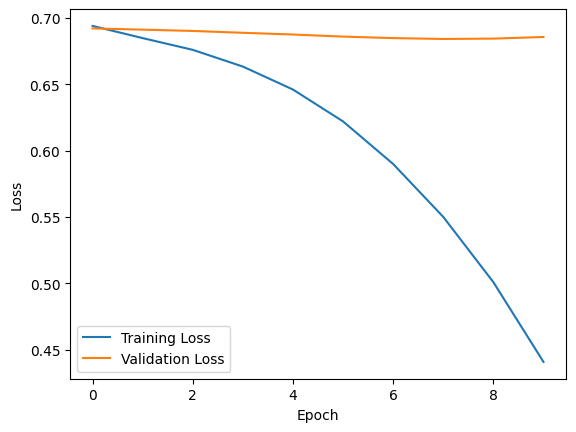

In [7]:
# Build The RNN model
rnn_model_500 = Sequential()

rnn_model_500.add(Embedding(10000,32,input_length =len(train_data_500[0])))
rnn_model_500.add(SimpleRNN(16,input_shape = (10000,maxlen), return_sequences=False,activation="relu"))
rnn_model_500.add(Dense(1)) #flatten
rnn_model_500.add(Activation("sigmoid")) #using sigmoid for binary classification
rnn_model_500.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

print(" ")
print("RNN Model Architecture : ")
print(rnn_model_500.summary())
print(" ")
# Train the RNN model
rnn_history_500 = rnn_model_500.fit(train_data_500, train_labels_500, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
rnn500_test_loss, rnn500_test_accuracy = rnn_model_500.evaluate(test_data, test_labels)

print("Test Loss : ", rnn500_test_loss)
print("Test Accuracy : ", rnn500_test_accuracy)


#Model Perfomance Evaluation
print(" ")
print("Perfomance of RNN Model for 500 Training Samples : ")
print(" ")
# Plot training and validation accuracy
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_500.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_500.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
print(" ")
print("Loss : ")
print(" ")
plt.plot(rnn_history_500.history['loss'], label='Training Loss')
plt.plot(rnn_history_500.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

RNN Model Architecture with Pretrained Embeddings : 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                1872      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1001889 (3.82 MB)
Trainable params: 1889 (7.38 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________
None
 
Epoch 1/10
16/16 [==============================] - 9s 512ms/step - loss: 0.7267 - accuracy: 0.4760 - val_loss: 0.7119 - val_accuracy: 0.4820
Epoch 2/10
16/16 [==============================] - 9s 593ms/step - loss: 0.7

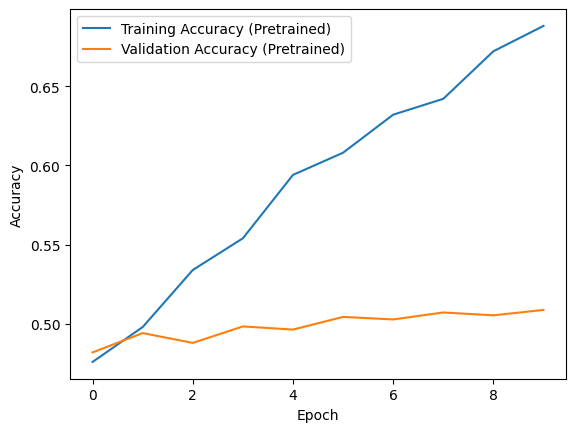

 
Loss : 
 


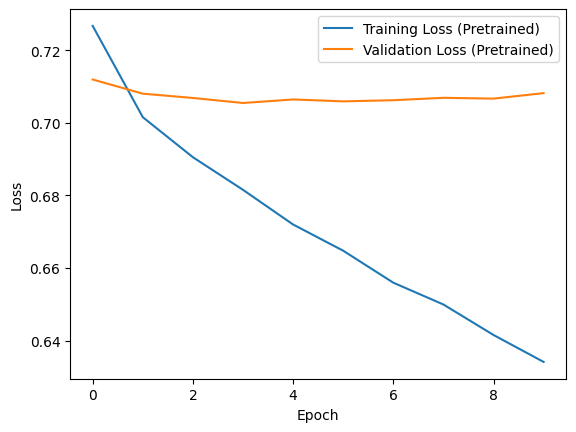

In [8]:
# Define the model with pretrained word embeddings
rnn_model_pretrained_500 = Sequential()
rnn_model_pretrained_500.add(Embedding(10000, embedding_dim, input_length=maxlen, trainable=False))  # Using pre-trained embeddings
rnn_model_pretrained_500.add(SimpleRNN(16, activation="relu"))
rnn_model_pretrained_500.add(Dense(1, activation='sigmoid'))

# Set the pretrained word embeddings
rnn_model_pretrained_500.layers[0].set_weights([embedding_matrix])

# Compile the model
rnn_model_pretrained_500.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print model summary
print("RNN Model Architecture with Pretrained Embeddings : ")
print(rnn_model_pretrained_500.summary())
print(" ")

# Train the RNN model with pretrained embeddings
rnn_history_pretrained_500 = rnn_model_pretrained_500.fit(train_data_500, train_labels_500, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the test data
pre_trained_rnn500_test_loss, pre_trained_rnn500_test_accuracy = rnn_model_pretrained_500.evaluate(test_data, test_labels)

print("Test Loss : ", pre_trained_rnn500_test_loss)
print("Test Accuracy : ", pre_trained_rnn500_test_accuracy)

# Plot training and validation accuracy
print("Perfomance of Pre Trained RNN Model for 500 Training Samples : ")
print(" ")
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_pretrained_500.history['accuracy'], label='Training Accuracy (Pretrained)')
plt.plot(rnn_history_pretrained_500.history['val_accuracy'], label='Validation Accuracy (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(" ")
print("Loss : ")
print(" ")
# Plot training and validation loss
plt.plot(rnn_history_pretrained_500.history['loss'], label='Training Loss (Pretrained)')
plt.plot(rnn_history_pretrained_500.history['val_loss'], label='Validation Loss (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **For Training Samples 1000**

In [9]:
# Select the first 100 samples for training
train_data_1000 = train_data[:1000]
train_labels_1000 = train_labels[:1000]

 
RNN Model Architecture : 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 32)           320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
 
Epoch 1/10
32/32 [==============================] - 11s 286ms/step - loss: 0.6917 - accuracy: 0.5170 - val_loss: 0.

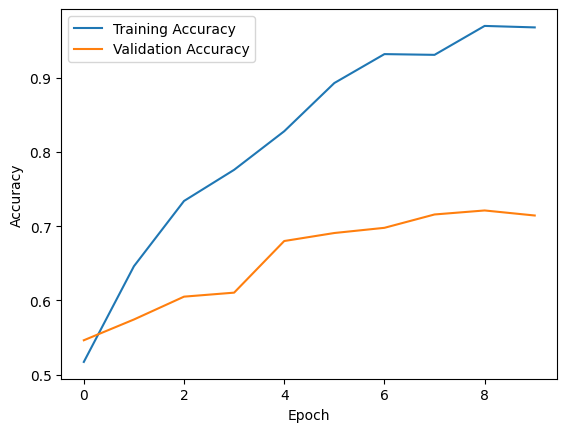

 
Loss : 
 


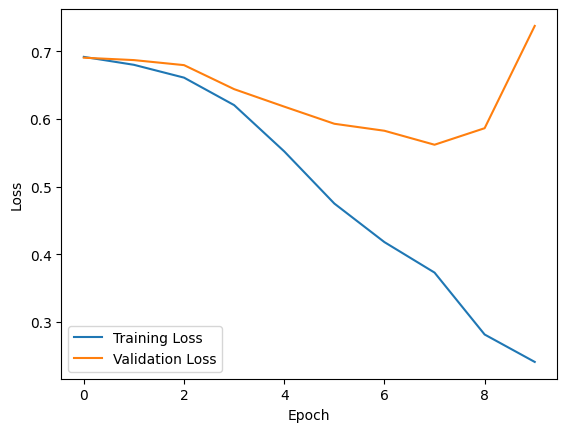

In [10]:

# Build The RNN model
rnn_model_1000 = Sequential()

rnn_model_1000.add(Embedding(10000,32,input_length =len(train_data_500[0])))
rnn_model_1000.add(SimpleRNN(16,input_shape = (10000,maxlen), return_sequences=False,activation="relu"))
rnn_model_1000.add(Dense(1)) #flatten
rnn_model_1000.add(Activation("sigmoid")) #using sigmoid for binary classification
rnn_model_1000.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

print(" ")
print("RNN Model Architecture : ")
print(rnn_model_1000.summary())
print(" ")
# Train the RNN model
rnn_history_1000 = rnn_model_1000.fit(train_data_1000, train_labels_1000, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
rnn1000_test_loss, rnn1000_test_accuracy = rnn_model_1000.evaluate(test_data, test_labels)

print("Test Loss : ", rnn1000_test_loss)
print("Test Accuracy : ", rnn1000_test_accuracy)


#Model Perfomance Evaluation
print(" ")
print("Perfomance of RNN Model for 1000 Training Samples : ")
print(" ")
# Plot training and validation accuracy
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_1000.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_1000.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
print(" ")
print("Loss : ")
print(" ")
plt.plot(rnn_history_1000.history['loss'], label='Training Loss')
plt.plot(rnn_history_1000.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

RNN Model Architecture with Pretrained Embeddings : 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                1872      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1001889 (3.82 MB)
Trainable params: 1889 (7.38 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________
None
 
Epoch 1/10
32/32 [==============================] - 7s 174ms/step - loss: 0.7308 - accuracy: 0.5070 - val_loss: 0.7142 - val_accuracy: 0.5134
Epoch 2/10
32/32 [==============================] - 8s 266ms/step - loss: 0.7

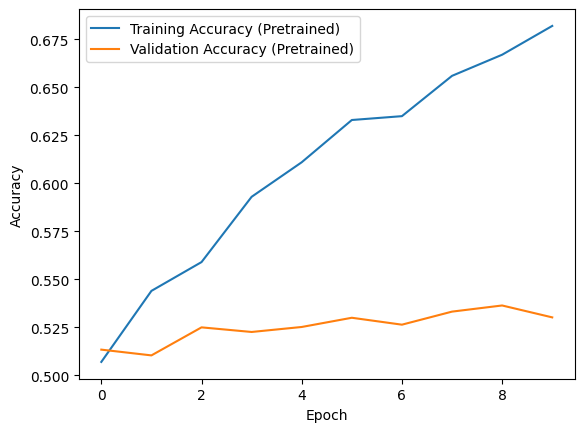

 
Loss : 
 


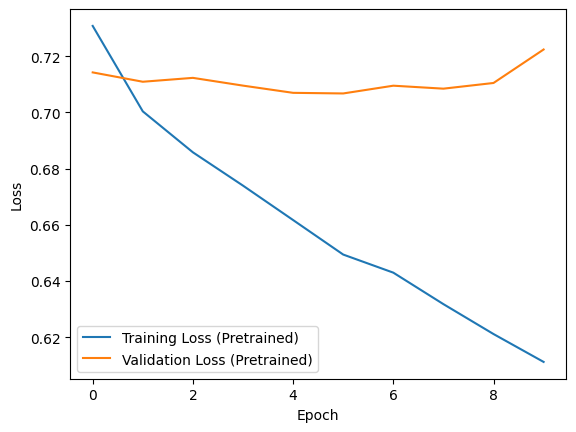

In [11]:
# Define the model with pretrained word embeddings
rnn_model_pretrained_1000 = Sequential()
rnn_model_pretrained_1000.add(Embedding(10000, embedding_dim, input_length=maxlen, trainable=False))  # Using pre-trained embeddings
rnn_model_pretrained_1000.add(SimpleRNN(16, activation="relu"))
rnn_model_pretrained_1000.add(Dense(1, activation='sigmoid'))

# Set the pretrained word embeddings
rnn_model_pretrained_1000.layers[0].set_weights([embedding_matrix])

# Compile the model
rnn_model_pretrained_1000.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print model summary
print("RNN Model Architecture with Pretrained Embeddings : ")
print(rnn_model_pretrained_1000.summary())
print(" ")

# Train the RNN model with pretrained embeddings
rnn_history_pretrained_1000 = rnn_model_pretrained_1000.fit(train_data_1000, train_labels_1000, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the test data
pre_trained_rnn1000_test_loss, pre_trained_rnn1000_test_accuracy = rnn_model_pretrained_1000.evaluate(test_data, test_labels)

print("Test Loss : ", pre_trained_rnn1000_test_loss)
print("Test Accuracy : ", pre_trained_rnn1000_test_accuracy)

# Plot training and validation accuracy
print("Perfomance of Pre Trained RNN Model for 1000 Training Samples : ")
print(" ")
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_pretrained_1000.history['accuracy'], label='Training Accuracy (Pretrained)')
plt.plot(rnn_history_pretrained_1000.history['val_accuracy'], label='Validation Accuracy (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(" ")
print("Loss : ")
print(" ")
# Plot training and validation loss
plt.plot(rnn_history_pretrained_1000.history['loss'], label='Training Loss (Pretrained)')
plt.plot(rnn_history_pretrained_1000.history['val_loss'], label='Validation Loss (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


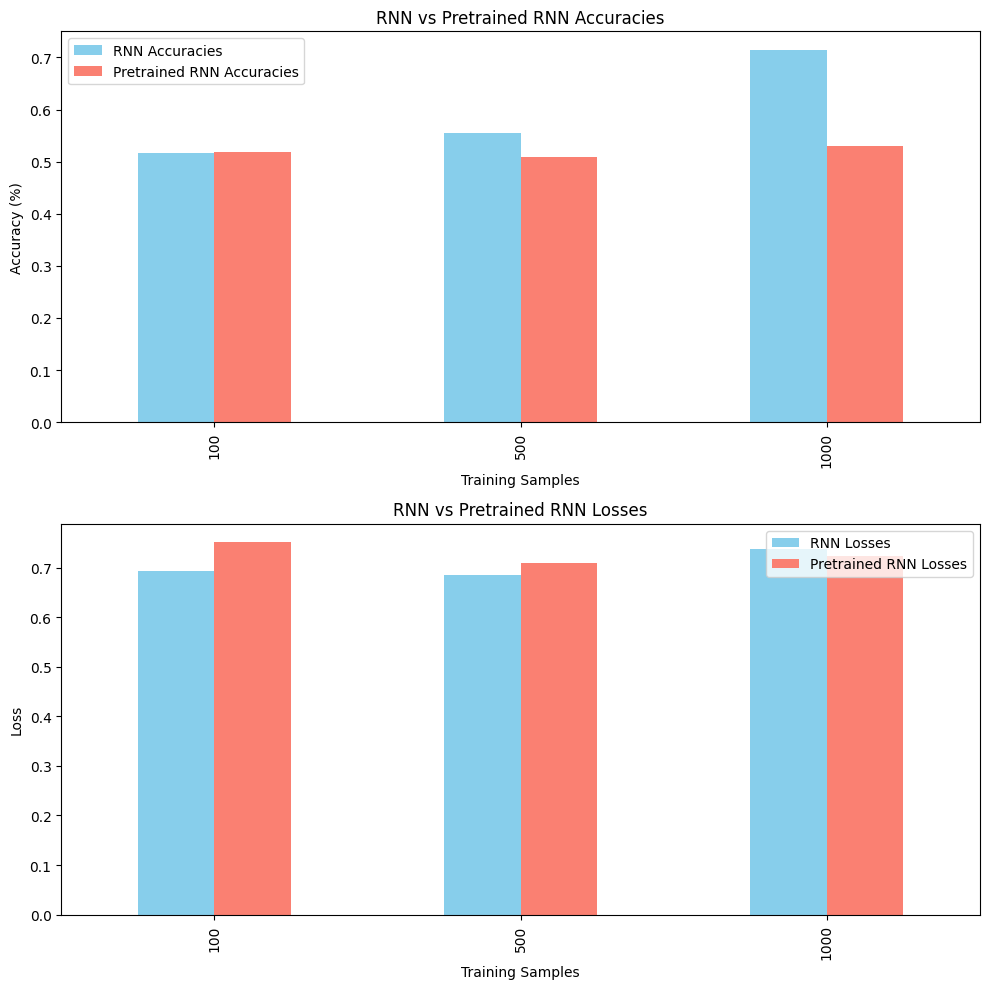

In [12]:
import pandas as pd


# Define RNN and pretrained RNN accuracies and losses
rnn_accuracies = [rnn100_test_accuracy, rnn500_test_accuracy, rnn1000_test_accuracy]  # RNN test accuracies
pretrained_accuracies = [pre_trained_rnn100_test_accuracy, pre_trained_rnn500_test_accuracy, pre_trained_rnn1000_test_accuracy]  # Pretrained RNN test accuracies

rnn_losses = [rnn100_test_loss, rnn500_test_loss, rnn1000_test_loss]  # RNN test losses
pretrained_losses = [pre_trained_rnn100_test_loss, pre_trained_rnn500_test_loss, pre_trained_rnn1000_test_loss]  # Pretrained RNN test losses

# Create a pandas DataFrame to store accuracies and losses
data = {
    "RNN Accuracies": rnn_accuracies,
    "Pretrained RNN Accuracies": pretrained_accuracies,
    "RNN Losses": rnn_losses,
    "Pretrained RNN Losses": pretrained_losses
}

index = ["100", "500", "1000"]  # Training samples

df = pd.DataFrame(data, index=index)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Accuracy comparison
df[["RNN Accuracies", "Pretrained RNN Accuracies"]].plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title("RNN vs Pretrained RNN Accuracies")
axes[0].set_xlabel("Training Samples")
axes[0].set_ylabel("Accuracy (%)")

# Loss comparison
df[["RNN Losses", "Pretrained RNN Losses"]].plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title("RNN vs Pretrained RNN Losses")
axes[1].set_xlabel("Training Samples")
axes[1].set_ylabel("Loss")

plt.tight_layout()
plt.show()
